In [205]:
%matplotlib widget

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from FunFit import *

In [206]:
# "C:\\Users\\oper\\SynologyDrive\\Lab2023\\Qubit\\data\\punchout\\punchout_202308\\data\\resonator punchout_0\\data.npz"

dic = {
    '0': "C:\\Users\\oper\\SynologyDrive\\Lab2023\\Qubit\\data\\punchout",
    '1': "C:\\Users\\fsfinardi\\Documents\\01_Personali\\Università-2324\\LabCrio\\data\\punchout"}

dir_path = dic['1']

files = os.listdir(dir_path)
for name in files:
    print(f'Directory {files.index(name)}: {name}')


n_dir = 0

file = np.load(f"{dir_path}\\{files[n_dir]}\\data\\resonator punchout_0\\data.npz")
print('\n', file.files)

Directory 0: 20231218_qw5q_gold_04_punchout
Directory 1: punchout_202308

 ['0', '2', '3', '4']


In [207]:
Nx = file.files[0]
print(Nx)
print(file[Nx].dtype)
name_data = Nx

freq    = file[name_data]['freq'][0:100]
# amp     = file[name_data]['amp'][::140]
amp     = file[name_data]['att'][::100]
# msr     = file[name_data]['msr']
msr     = file[name_data]['signal']
msr = msr / msr.max()
phase   = file[name_data]['phase']

0
[('freq', '<f8'), ('att', '<f8'), ('signal', '<f8'), ('phase', '<f8')]


In [208]:
a = msr
sub_len = len(a) // 30
result = [a[i:i + sub_len] for i in range(0, len(a), sub_len)]
len(result[0])

100

In [209]:
print(len(amp))
print(len(freq))
print(len(result[0]))

30
100
100


In [210]:
# Crea una meshgrid per gli assi x e y
X, Y = np.meshgrid(freq, amp)
data = []
for i in range(0,len(result)):
    data.append(result[i])


data = np.array(data)


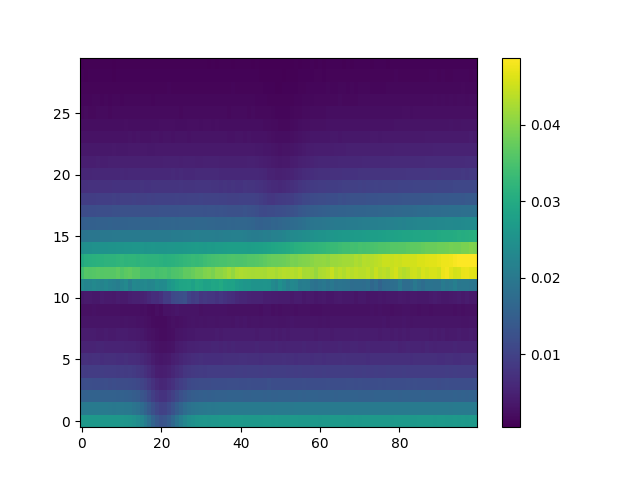

In [211]:
plt.figure()
plt.imshow(data, aspect="auto", origin='lower')

colorbar = plt.colorbar()

In [212]:
import plotly.express as px

fig = px.imshow(data, aspect="auto", labels=dict(x = 'Frequency', y = 'Amplitude', z = 'MSR'), x = freq, y = amp, origin = 'lower')

fig.update_layout(
    xaxis=dict(tickformat=".1e"), 
    width = 800,
    height = 500
    )

fig.update_traces(hoverongaps=False, hovertemplate='Frequency: %{x}<br>Amplitude: %{y}<br>MSR: %{z}')

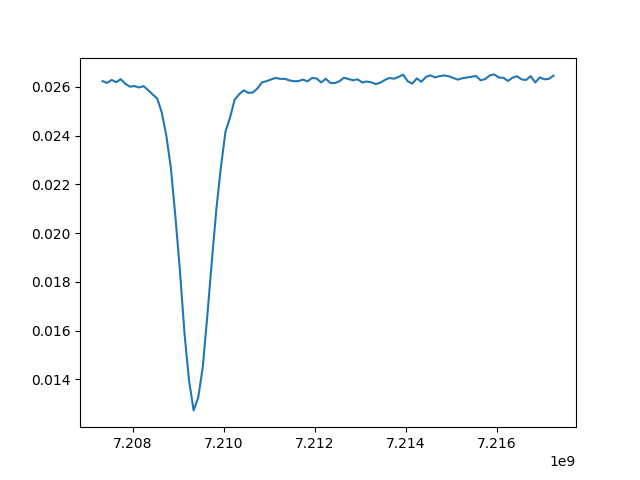

In [213]:
plt.figure()
plt.plot(freq,result[0])
